# Unsupervised learning




## Content Based Recommendation System
## Semantic data display using SOM

In [0]:
!pip install --upgrade pip
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade nltk
!pip install --upgrade scikit-learn

Requirement already up-to-date: pip in /home/manosbagakis/programming/Python/jup_pyth_nn_project/jup_pyth_nn_ENV/lib/python3.5/site-packages (18.1)
Requirement already up-to-date: numpy in /home/manosbagakis/programming/Python/jup_pyth_nn_project/jup_pyth_nn_ENV/lib/python3.5/site-packages (1.16.0)
Requirement already up-to-date: pandas in /home/manosbagakis/programming/Python/jup_pyth_nn_project/jup_pyth_nn_ENV/lib/python3.5/site-packages (0.23.4)
Requirement already up-to-date: nltk in /home/manosbagakis/programming/Python/jup_pyth_nn_project/jup_pyth_nn_ENV/lib/python3.5/site-packages (3.4)
Requirement already up-to-date: scikit-learn in /home/manosbagakis/programming/Python/jup_pyth_nn_project/jup_pyth_nn_ENV/lib/python3.5/site-packages (0.20.2)


## Εισαγωγή του Dataset

The data set we will work on is based on [Carnegie Mellon Movie Summary Corpus] (http://www.cs.cmu.edu/~ark/personas/). This is a dataset with about 40,000 movie descriptions. The description of each movie consists of its title, one or more labels that characterize the type of film and the summary of her story. First we import the dataset (use the code itself, you do not need the csv file) in the dataframe `df_data_1`:

Each team will work on a unique subset of 5,000 movies (different dataset for each group) as follows

1. Each team can find [here] (https://docs.google.com/spreadsheets/d/12AmxMqvjrc0ruNmZYTBNxvnEktbec1DRG64LW7SX4HA/edit?usp=sharing) the unique Seed number from 1 to 128.

2. The data frame `df_data_2` has 128 rows (groups) and 5,000 columns. Each row corresponds to the table row with its team_seed_number. This line will contain 5,000 different numbers corresponding to tapes of the original dataset.

3. In the next cell, change the `team_seed_number` variable with your group's Seed from Google Sheet.

4. Run the code. The unique ones for each group of titles, categories, catbins, summaries and corpus with which you will work.

In [0]:
import pandas as pd
import numpy as np
dataset_url = "https://drive.google.com/uc?export=download&id=1PdkVDENX12tQliCk_HtUnAUbfxXvnWuG"
# make direct link for drive docs this way https://www.labnol.org/internet/direct-links-for-google-drive/28356/
df_data_1 = pd.read_csv(dataset_url, sep='\t',  header=None, quoting=3, error_bad_lines=False)
# βάλτε το seed που αντιστοιχεί στην ομάδα σας: Ομάδα Β13 -> Seed 77
team_seed_number = 77

movie_seeds_url = "https://drive.google.com/uc?export=download&id=1NkzL6rqv4DYxGY-XTKkmPqEoJ8fNbMk_"
df_data_2 = pd.read_csv(movie_seeds_url, header=None, error_bad_lines=False)

# επιλέγεται 
my_index = df_data_2.iloc[team_seed_number,:].values

titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(np.float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries


- The ** titles ** table contains the titles of the movies. Example: 'Sid and Nancy'.
- The ** categories ** table contains the categories (types) of the movie in the string format. Example: Tragedy, Indie, Punk Rock, Addiction Drama, Cult, Musical, Drama, Biopic feature, Romantic drama, Romance Film "," Biographical film ". We notice that it is a comma separated list of strings, with each string being a category.
- The ** catbins ** table again includes movie categories but in binary format ([one hot encoding] (https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do -you-have-to-use-it-e3c6186d008f)). It has dimensions of 5,000 x 322 (as many as the different categories). If the movie belongs to that genre, the corresponding column gets 1, otherwise it gets 0.
- The ** ** summaries ** and ** ** ** list include movie summaries (the corpus is simply the list's summaries). Each synopsis is a (usually large) string. Example: * The film is based on the real story of a Soviet Troop Troop soldier who killed his entire unit as a result of Dedovschina. The plot unfolds mostly on board the prison rail transport car guarded by a unit of paramilitary conscripts. '*
- We consider ** ** ** of each movie its line number or corresponding item in the list. Example: In order to print the summary of the movie with `ID = 99` (the centimeter) we will write` print (corpus [99]) `.

# Application 1: Implement a content-based video recommendations system

The first application you develop will be a content based recommendationer system (https://en.wikipedia.org/wiki/Recommender_system). Recommendation systems aim to automatically suggest the user objects from a collection that we want the user to find interesting. The categorization of recommendation systems is based on how to select (filter) the recommended items. The two main categories are collaborative filtering where the system suggests to the user objects that have been positively evaluated by users who have a similar rating history and content based filtering where objects are proposed to the user with similar content (based on some attributes), with those previously assessed positively.

The recommendations system you will develop will be based on ** content ** and specifically in the corpus summaries.

## Convert to TFIDF

The first step will be to convert the corpus into a representation of tf-idf: term frequency-inverse document frequency, and a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus

### For the pre-processing of the data, we did the following:

1) Initially, we replaced all punctuation and white characters with spaces. The symbols to be removed are placed in the dic list
2) Then we used Porter Stemmer that was used in the laboratory to do the stemming. <br>
3) During the tests we discovered that min_df does not remove names that may appear in more than one movie (eg "Ice Age", while 9/10 suggestions were directly relevant, we also received the movie "Manito" as a suggestion because one of the protagonists was also called "manni." The same thing happened in the film "Die Hard", where we suggested the "PS I love you", which has nothing to do but has and in 2 the name "hollie"). So we used as stop words and the list of English names (female and male) provided by nltk.corpus. In order for this addition to make sense, we also made stemming in names. <br>

So, we received the list of corpuses again without the specific symbols and with all the words in their stemmed form.


### Further processing of the corpus was done with the TfidfVectorizer itself, by which: <br> <br>
1) We converted all alphabetic characters to lowercase, with the lowercase = true parameter. <br>
2) We removed from the corpus the stop words included in the English stop words list, which we downloaded from NLTK. <br>
3) We did not use a tokenizer because the only advantage it offers with regard to the simple split is the separation not only with blanks but also with white characters that have been removed.
4) We split each word with the analyzer = 'word'
5) We chose to remove words appearing in at least 40% of texts (2000 texts) and words appearing in less than 3 texts, setting ** max_df = 0.4 ** and ** min_df = 3 ** respectively.

In [0]:
#####Text Optimization#######

#first replace all punctuation and white characters with spaces
dic=[",",".","!","?",":",";",'"','&',"-","_",")","(","[","]","{","}","`","\n","\t","'","\'"]
simplified_corpus=[]
for it in corpus:
  new=it
  for character in dic:
    new=new.replace(character," ")    
  simplified_corpus.append(new)
corpus=simplified_corpus

#stem the corpora
from nltk.stem.porter import PorterStemmer
porter_stemmer=PorterStemmer()
new_corpus=[]
for text in corpus:
  new_text=""
  for word in text.split(" "):
    word=porter_stemmer.stem(word)
    new_text=new_text+" "+word

    
  new_corpus.append(new_text)

corpus=new_corpus

#use english stop words and english first names (female and male) as stopwords
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
nltk.download('names')
# from http://www.nltk.org/howto/corpus.html
from nltk.corpus import stopwords, names
stopWords=set(stopwords.words('english')+names.words('male.txt')+names.words('female.txt'))

#stem the stop words
stem_stop_words=[]
for word in stopWords:
  word=porter_stemmer.stem(word)
  stem_stop_words.append(word)
#print(stopWords)
def dummy_fun(doc):
    return doc.split()

##########################################
#Creare tf_idf_array from optimized corpus#
##########################################
#use the TfidfVectorizer with no tokenizer (we do the split with analyzer='word', and make all letters lowercase)
def create_tfidf_array(maxdf, mindf):
  vectorizer = TfidfVectorizer(analyzer='word', stop_words=stem_stop_words, lowercase=True, decode_error='strict', tokenizer=None, max_df=maxdf, min_df=mindf)
  vectorizer.fit(corpus)
  tf_idf_array = vectorizer.fit_transform(corpus).toarray()
  test=tf_idf_array.tolist()
  print(tf_idf_array.shape)
  return test

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/manosbagakis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package names to
[nltk_data]     /home/manosbagakis/nltk_data...
[nltk_data]   Package names is already up-to-date!


## Implementation of the recommendations system

The recommendation system you will deliver is a `content_recommender` function with two 'target_movie' and 'max_recommendations' arguments. In 'target_movie' we pass the ID of a target movie for which we are interested in finding content-like movies 'max_recommendations' in the crowd.
Build the function as follows:
- for the target movie, from `corpus_tf_idf` calculate [cosinity resemblance] (https://en.wikipedia.org/wiki/Cosine_similarity) of all the movies in your collection
- Based on the cosinity simulation you have calculated, create a sorted table from the largest to the smallest, with the indices (`ID`) of the movies. For example, if index 1 has a cosinity similarity with 3 strips \ [0.2 1 0.6 \] (it has 1 similarity to itself), this index index table will be \ [1 2 0 \].
- For target tape print: id, title, synopsis, categories (categories)
- For the `max_recommendations` tapes (except for the target band itself that has a cosine similarity 1 with itself) with the most cosine similarity (in descending order), print a recommendation order (1 closest, 2 nd second closest etc ), id, title, summary, categories (categories)

In [0]:
limit=5000
def content_recommender(target_movie,max_recommendations):
  import scipy as sp
  from operator import itemgetter
  similarity=[]
  for i in range(limit):
    #print(target_movie,i)
    similarity.append(1-sp.spatial.distance.cosine(test[target_movie],test[i]))
  #print(similarity)
  ext_list=[]
  for i in range(limit):
    ext_list.append([similarity[i],i])
  ext_list.sort(reverse=True)
  #print(ext_list)
  indices=[]
  for x in ext_list[:max_recommendations+1]:
    indices.append(x[1])
    
  for x in indices:
    print(titles[x],categories[x],corpus[x])



## Optimization

We found a set of movies that we already know to be able to check whether the suggested ones are really related.

In [0]:
test_movies =[]
for i in range(5000):
  if titles[i]=='WALL-E':
    print(i, ' ', titles[i])
    test_movies.append(i)
  if titles[i]=='The Holiday':
    print(i, ' ', titles[i])
    test_movies.append(i)
  if titles[i]=='Eat Pray Love':
    print(i, ' ', titles[i])
    test_movies.append(i)
  if titles[i]=='Midnight in Paris':
    print(i, ' ', titles[i])
    test_movies.append(i)
  if titles[i]=='Ice Age: Dawn of the Dinosaurs':
    print(i, ' ', titles[i])
    test_movies.append(i)
  
   
  if titles[i]=='Die Hard':
    print(i, ' ', titles[i])
    test_movies.append(i)
  if titles[i]=='Bambi II':
    print(i, ' ', titles[i])
    test_movies.append(i)
  if titles[i]=='The Snow Queen':
    print(i, ' ', titles[i])
    test_movies.append(i)
  if titles[i]=='Rambo: First Blood Part II':
    print(i, ' ', titles[i])
    test_movies.append(i)

print(273, ' ', titles[273])
test_movies.append(273)
print(test_movies)

109   ['The Snow Queen']
216   ['WALL-E']
272   ['Bambi II']
402   ['Die Hard']
448   ['The Holiday']
464   ['Ice Age: Dawn of the Dinosaurs']
855   ['Rambo: First Blood Part II']
1170   ['Eat Pray Love']
1372   ['Midnight in Paris']
273   ['Journey to the Center of the Earth']
[109, 216, 272, 402, 448, 464, 855, 1170, 1372, 273]


### With the following we tested various combinations min_df and max_df.

In [0]:
create_tfidf_array(0.4, 3)
for i in test_movies:
  print(titles[i],'\n')
  print(content_recommender(i, 5))



(5000, 11027)
['The Snow Queen'] 

['The Snow Queen'] ['"Family Film",  "Adventure",  "Animation"']  elli  and her brother tom  listen to their grandmoth read them a stori about the evil snow queen  and her troll  when their younger sister polli  ask tom if the snow queen is come to their hous  tom say that she onli exist in the stori  howev  the snow queen realli doe live in an ici palac in the north pole with her three troll servant  eric   baggi   and wardrob   the snow queen s plan is to set up her magic mirror  on a mountain so that it will freez the world so she can take it over  they take the mirror on their fli machin and set it up against a pickax to keep it in place on the mountain  howev  at the last second  the pickax break and the mirror goe fli off the mountain and land on the propel blade of the troll  fli machin  caus it to shatter into piec  two of the piec go fli to the villag and hit tom in the eye and the heart  turn him evil  the snow queen send her bat to retriev 

## Explanation of options and qualitative interpretation

After optimization, we ended up with the above combination of max_df and min_df, as we noticed that for larger parameters, meaningless meaning was lost, since many films are related to each other due to very specific circumstances, while for smaller ones there appeared films that shared very specific features.
As it turns out, the suggested films for the 10 below have a similar plot
Specifically: <br>
** 109 The Snow Queen **: It's about having an affair taking place in an environment that includes snow, a castle, a drama, a queen, a mirror, and a battle, saving one's own. Movies that appear as suggested have either all of these features. The most "irrelevant" we would say is the 417, which however includes the Snow Queen and the Magic Mirror, so it necessarily matched. <br>
** 216 WALL-E: ** has to do with a case that occurs in a future dystopian environment, robot, robotic attack, planet Earth as well as space travel. The greatest success is that BURN-E, a spin-off film of WALL-E with the same characteristics, appears as the top recommendation. Movies that appear as suggested have either all of these features
** 272 Bambi II: ** has to do with a case that is likely to be played in forest, starring animals but also the relationship between father and child who is passing through crisis, and the concepts of friendship, family, as well as sadness for a story . Movies that appear as suggested have either all of these features
** 273 Journey to the Center of the Earth: ** has to do with an assumption that may be taking place in the center of the Earth or in some other inhospitable and strange environment where the point is that someone is trapped and is trying to save him. Movies that appear as suggested have either all of these features
** 402 Die Hard: ** It's about a hypothesis that is likely to happen in the Christmas season, it's about a husband's relationship with his wife, with violence and hostages. Movies that appear as suggested have either all of these features
** 448 The Holiday: ** has to do with a hypothesis that is likely to happen in the Christmas season, it's about the relationship of anger, travel, difficulty finding a husband and adultery. Movies that appear as suggested have either all of these features
** 464: Ice Age: Dawn of the Dinosaurs: ** It has to do with a case that is likely to be played in the dinosaur era and has to do with the advent of a baby in a family, as well as the salvation of the characters by an event . The biggest victory here is that Land Before Time appears. Movies that appear as suggested have either all of these features
** 855 Rambo: Foirst Blood Part II: ** It has to do with a case involving soldiers, war, weapons, violence and a lot of action. Movies that appear as suggested have either all of these features
** 1170 Eat Pray Love: ** It has to do with a case involving a busy woman, traveling, religion, eating and unable to find a companion. Movies that appear as suggested have either all of these features
** 1372 Midnight in Paris: ** It has to do with a hypothesis that probably takes place in Paris, and it is related to belle epoque, writers, unrest in the relationship of an antirogione. Movies that appear as suggested have either all of these features. The weakness that we have identified is that some films with an irrelevant case appear, but they are related to Paris. This could be avoided if we included stop lists and a list of city names

In [0]:
from sklearn.externals import joblib
joblib.dump(corpus, 'som_f2.pkl') 
#corpus_tf_idf = joblib.load('corpus_tf_idf.pkl')

['som_f2.pkl']

# Application 2. Semantic display of the SOM film collection
<img src = "http://visual-memory.co.uk/daniel/Documents/intgenre/Images/film-genres.jpg" width = "35%">




## SOM Map Training

We will work with the SOM ["Somoclu"] library (http://somoclu.readthedocs.io/en/stable/index.html). We introduce somoclu and matplotlib and tell matplotlib to print inside the notebook (not the pop up window).

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import somoclu
%matplotlib inline
# install somoclu
!pip install --upgrade somoclu

def build_final_set(doc_limit, tf_idf_only):
    # convert sparse tf_idf to dense tf_idf representation
    dense_tf_idf = tf_idf_array[0:doc_limit,:]
   
    if tf_idf_only:
        # use only tf_idf
        final_set = dense_tf_idf
    else:
        # append the binary categories features horizontaly to the (dense) tf_idf features
        final_set = np.hstack((dense_tf_idf, catbins[0:doc_limit,:]))
        # η somoclu θέλει δεδομ΄ένα σε float32
    return np.array(final_set,dtype=np.float32)



### After many trainings, we came up with the following parameters:

CPU times: user 2h 2min 51s, sys: 10.3 s, total: 2h 3min 1s
Wall time: 56min 58s


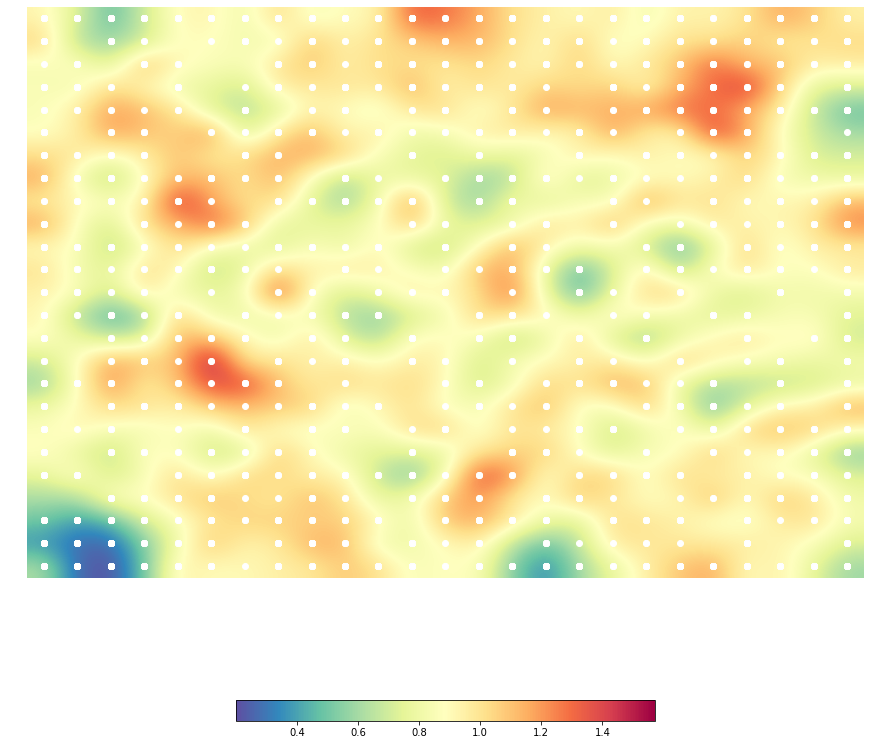

<module 'matplotlib.pyplot' from '/home/manosbagakis/programming/Python/jup_pyth_nn_project/jup_pyth_nn_ENV/lib/python3.5/site-packages/matplotlib/pyplot.py'>

In [0]:
doc_limit=5000 #data size 
n_rows, n_columns = 25,25 # number of neurons =625
Epochs=70
som_test=build_final_set(doc_limit,False)
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)

%time som.train(som_test,epochs=Epochs)

som.view_umatrix(bestmatches=True,colorbar=True, figsize=(15, 15))

### After many trainings, we came up with the following parameters:

## Best matching units

After each training, store in one variable the best matching units (bmus) for each movie. Bmus shows us what neuron each film belongs to. Caution: the neural coordinate convention is (column, line) that is the upside down by Python. Using [np.unique] (https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.unique.html) (a very useful exercise function) save the unique best matching units and their indexes towards the films. Note that you may have fewer unique bmus than a number of neurons because some neurons may not have been assigned to movies. As a neuron number we will consider the line number in the unique bmus table.

CPU times: user 4.51 s, sys: 2.02 s, total: 6.52 s
Wall time: 3.24 s


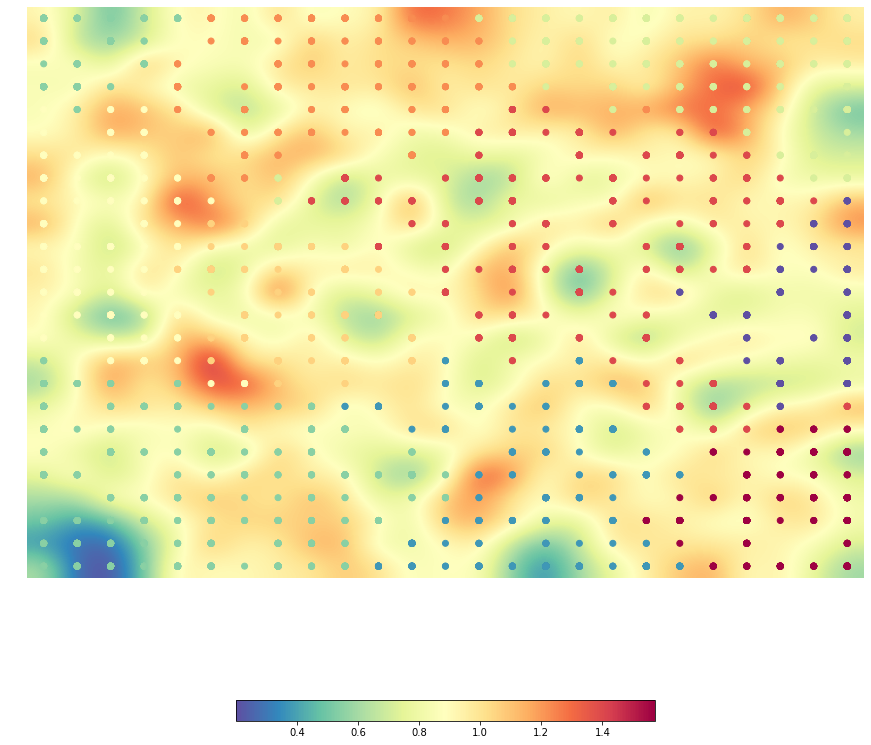

(25, 25)


In [0]:
import collections


bmus = som.bmus
#print(bmus.shape)
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)
from sklearn.cluster import KMeans
n_clusters=9
algorithm = KMeans(n_clusters)
%time som.cluster(algorithm=algorithm)
som.view_umatrix(bestmatches=True,colorbar=True, figsize=(15, 15))
print(som.clusters.shape)

In [0]:
from sklearn.externals import joblib
joblib.dump(som, 'som_final2.pkl') 

['som_final2.pkl']

## Visualization of U-matrix, clustering and clusters size

The maps above are shown after som som training as well as after clustering
with the kmeans algorithm.

## Semantic interpretation of clusters

We then define a few functions that will help us visualize the results. In particular, we estimate how many strips correspond to each neuron. Then, from the clusters map, we remove the inactive neurons (which are not mapped to them) by giving the -1 value instead of the cluster_id that they had previously. Finally, for each cluster we calculate the incidence of each class in it by summing the individual occurrences of each neuron belonging to that cluster.
Finally, in order to compare the results, we print the category frequencies and the 5,000 tapes that make up the dataset we are working on.

In [0]:
#first we need to know which neurons were not used
neuron_freq = [[-1 for x in range(n_rows)] for y in range(n_columns)] 

for n_id in indices:
    coords=ubmus[n_id]
    neuron_freq[coords[0]][coords[1]]=neuron_freq[coords[0]][coords[1]]+1
    if (neuron_freq[coords[0]][coords[1]]==0):
        neuron_freq[coords[0]][coords[1]]=neuron_freq[coords[0]][coords[1]]+1

#to remove them from the cluster. 
#instead of the cluster id, they have an id of -1
import copy
test_clusters=copy.deepcopy(som.clusters)
#print(test_clusters)
for i in range(n_rows):
    for j in range(n_columns):
        if (neuron_freq[i][j]==-1):
            test_clusters[j][i]=-1
            
#appends list of categories of each active neuron in total_neuron_categories
total_neuron_categories=[]
for active_neuron_id in range(len(ubmus)):
    neuron_categories=[]
    for movie_id in range(len(indices)):
        if (indices[movie_id]==active_neuron_id):
            neuron_categories=useless_conversion(neuron_categories,categories[movie_id])
    #neuron_categories=collections.Counter(neuron_categories)
    total_neuron_categories.append(neuron_categories)


#from their format, categories[i] seem to be a list of strings BUT DONT BE FOOLED
#they are not
#so we convert them to actual strings
def useless_conversion(old, pretend_string):
    actual_string=str(pretend_string)
    actual_string=actual_string[2:len(actual_string)-2]
    actual_string=actual_string.split(',  ')
    old.extend(actual_string)
    return old

#for a neuron with known coordinates in the cluster, find the id it has at the ubmus array
def find_neuron_ubmu_index(i,j):
    for it in range(len(ubmus)):
        
        if ((ubmus[it][0]==j)and(ubmus[it][1]==i)):
            return it

#for each neuron in a cluster how many movies are in each category
def cluster_categories_collect(cluster_id):
    cluster_categories=[]
    for i in range(n_rows):
        for j in range(n_columns):
            if (test_clusters[i][j]==cluster_id):
                
                ubmu_id=find_neuron_ubmu_index(i,j)
                cluster_categories.extend(total_neuron_categories[ubmu_id])
    return collections.Counter(cluster_categories)

#for each cluster, show how many movies are in each category it includes    
def data_show():
    for cluster_id in range(n_clusters):
        print('Cluster id is',cluster_id,'\n')
        print(cluster_categories_collect(cluster_id),'\n')
    return

In [0]:
print('total of movies:',doc_limit,'\nnumber of neurons:',n_rows*n_columns,'\nEpochs:',Epochs,'\nNumber of clusters:',n_clusters,'\n')
data_show()

total of movies: 5000 
number of neurons: 625 
Epochs: 70 
Number of clusters: 9 

Cluster id is 0 

Counter({'"Romance Film"': 393, '"Drama"': 392, '"Romantic drama"': 239, '"World cinema"': 143, '"Musical"': 52, '"Bollywood"': 37, '"Comedy"': 36, '"Period piece"': 36, '"Film adaptation"': 31, '"Romantic comedy"': 29, '"Black-and-white"': 27, '"Crime Fiction"': 26, '"Action"': 26, '"War film"': 25, '"Indie"': 25, '"Melodrama"': 20, '"Thriller"': 18, '"Comedy-drama"': 18, '"Art film"': 16, '"Action/Adventure"': 16, '"Comedy film"': 15, '"Fantasy"': 14, '"Adventure"': 14, '"Chinese Movies"': 13, '"Mystery"': 13, '"Biography"': 12, '"Biographical film"': 12, '"Costume drama"': 10, '"Coming of age"': 9, '"Family Film"': 9, '"Political drama"': 8, '"Epic"': 8, '"Family Drama"': 8, '"Sports"': 8, '"Teen"': 7, '"Biopic [feature]"': 7, '"Marriage Drama"': 7, '"Music"': 7, '"Television movie"': 7, '"Historical fiction"': 5, '"Dance"': 5, '"History"': 5, '"Filipino Movies"': 5, '"Musical Drama"

In [0]:
#find how many movies are in each category for all clusters
def total_cluster_categories():
    cluster_categories=[]
    for i in range(n_rows):
        for j in range(n_columns):
            if (test_clusters[i][j]!=-1):
                
                ubmu_id=find_neuron_ubmu_index(i,j)
                cluster_categories.extend(total_neuron_categories[ubmu_id])
    return collections.Counter(cluster_categories)
print(total_cluster_categories())

Counter({'"Drama"': 2340, '"Comedy"': 1233, '"Thriller"': 788, '"Romance Film"': 776, '"Action"': 707, '"World cinema"': 630, '"Crime Fiction"': 514, '"Horror"': 499, '"Black-and-white"': 452, '"Action/Adventure"': 416, '"Indie"': 401, '"Family Film"': 392, '"Adventure"': 381, '"Short Film"': 370, '"Musical"': 339, '"Animation"': 296, '"Science Fiction"': 292, '"Romantic drama"': 281, '"Mystery"': 270, '"Fantasy"': 246, '"Romantic comedy"': 234, '"Comedy film"': 223, '"War film"': 195, '"Crime Thriller"': 194, '"Japanese Movies"': 166, '"Psychological thriller"': 151, '"Silent film"': 142, '"Comedy-drama"': 142, '"Bollywood"': 136, '"Period piece"': 132, '"Film adaptation"': 127, '"Documentary"': 118, '"Western"': 113, '"Chinese Movies"': 106, '"Family Drama"': 100, '"Black comedy"': 99, '"Teen"': 96, '"Children\\\'s/Family"': 93, '"Parody"': 91, '"Slasher"': 83, '"Coming of age"': 81, '"Television movie"': 77, '"Cult"': 77, '"Sports"': 75, '"Film noir"': 74, '"Slapstick"': 73, '"Biogr

print(test_clusters)

## Explained Results, Conclusions

Regarding u_matrix and its training som, starting with small values ​​in data_size, a number of neurons and training seasons, we came to the following conclusions:
    
1. Having a small number of neurons we noticed that clustering is not efficient and most clusters did not have a clear preference for the frequencies that occurred. As we grow neurons, clusters tend to slowly lean toward specific species. However, after a point of neurons (> 800) we were unable to find acceptable results. This is logical since in each neuron very few bands emerged to produce clustering results.
2. The few training sessions did not give as exact results as we wanted. Increasing them we noticed improvement and then a kind of saturation so we stopped growing them.
3. Regarding the map created during its education, we observe that blue regions have been created, which are separated by red areas and between clusters and borders, yellow regions. In a small number of neurons the largest part of the map is red, logical since the distribution in the neurons is poor and not enough blue areas are created.



About clustering, and the results of each cluster in the frequency of each category in them:

1. First looking at the results for different values ​​of n_clusters, we found that value 9 is the best. At great prices (> 20) we see that many clusters have categories that either do not mix well with each other (thriller, comedy) or are divided into many clusters (specifically in 25 clusters, the 776 instances of romance film shared in 8 clusters with at least 40 appearances in each). For lower clusters, we noticed that it overcalls the clusters and we can not draw useful conclusions from them.
2. For the coloring of neurons on the map after clustering, we observe that each blue area belongs to another cluster that usually reaches the border where we change the cluster region.

Explanation, justification of clusters results:
### Cluster0:
The first cluster contains primarily Romance Film (393), Drama (392). These two species are related, and this is confirmed by the third category that appears, Romantic Drama (239). It is remarkable to see the musical (52), bollywood (37) categories very often associated with romantic movies.
### Cluster1:
In this cluster we observe that the category Drama is prevalent. Here, let's note that this category appears in more than 40% of the movies! The next category is World Cinema, which can safely be assumed to be a category that is combined with the rest of the categories, regardless of the genre, and therefore it makes sense to coexist with the Drama, the most prominent category.
### Cluster2:
Here the Comedy class dominates and cluster consistency is confirmed by looking at the following categories, often associated with comedy genre (short film, family film, slapstick, parody).
### Cluster3:
Here it is clear that this is the cluster of horror films that would be said to focus on splatter techniques (horror, thriller, slasher !, B-movie).
### Cluster4:
Unlike the above cluster, this person has thriller, horror films but
it focuses more on mystery, crime (and drama) movies (thriller, drama, mystery, crime fiction, crime thriller, horror).
### Cluster5:
This cluster focuses on action and adventure films with secondary elements of the thriller, and crimes (one would say, the 'serious' action bands).
### Cluster6:
Here we have animated movies (animation, short film, children's, Family).
### Cluster7:
Unlike Cluster5 here we have action and adventure films with comic, romantic elements (action, adventure, comedy film, romance film). Note that the map is adjacent to Cluster5 also associated with action movies.
### Cluster8:
Finally we have comedy movies again but this time the cluster focuses on romantic, dramatic films as opposed to Cluster2 (comedy, romantic comedy, drama, comedy drama).